In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Memanggil Data

In [ ]:
#Menginstall library yang akan digunakan
#optimasi parameter otomatis pada model neural network
!pip install keras-tuner --upgrade
#melakukan import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import figure_factory as figfac
from termcolor import colored

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from tqdm.keras import TqdmCallback

from sklearn.model_selection import GridSearchCV
from keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

import warnings
warnings.simplefilter('ignore')

# abaikan Peringatan
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/full_Daily-Harga_Emas.csv")
fig = figfac.create_table(data.head(n = 10))
fig.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5294 entries, 0 to 5293
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5294 non-null   object 
 1   Open         5294 non-null   object 
 2   High         5294 non-null   object 
 3   Low          5294 non-null   object 
 4   Close*       5294 non-null   object 
 5   Adj Close**  5294 non-null   object 
 6   Volume       5294 non-null   float64
dtypes: float64(1), object(6)
memory usage: 289.6+ KB


#Preprocessing Data

In [ ]:
data['Date'] = data['Date'].astype('datetime64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5294 entries, 0 to 5293
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5294 non-null   datetime64[ns]
 1   Open         5294 non-null   object        
 2   High         5294 non-null   object        
 3   Low          5294 non-null   object        
 4   Close*       5294 non-null   object        
 5   Adj Close**  5294 non-null   object        
 6   Volume       5294 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 289.6+ KB


In [ ]:
data['Open'] = data['Open'].apply(lambda x: float(x.split()[0].replace(',', '')))
data['High'] = data['High'].apply(lambda x: float(x.split()[0].replace(',', '')))
data['Low'] = data['Low'].apply(lambda x: float(x.split()[0].replace(',', '')))
data['Close*'] = data['Close*'].apply(lambda x: float(x.split()[0].replace(',', '')))
data['Adj Close**'] = data['Adj Close**'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5294 entries, 0 to 5293
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5294 non-null   datetime64[ns]
 1   Open         5294 non-null   float64       
 2   High         5294 non-null   float64       
 3   Low          5294 non-null   float64       
 4   Close*       5294 non-null   float64       
 5   Adj Close**  5294 non-null   float64       
 6   Volume       5294 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 289.6 KB


In [ ]:
print('waktu terawal dari kolom Datetime adalah:', data['Date'].min())
data.head()

waktu terawal dari kolom Datetime adalah: 2000-09-05 00:00:00


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-06-02,1977.1,1982.5,1947.4,1952.4,1952.4,750.000
1,2023-06-01,1963.2,1983.0,1954.3,1978.0,1978.0,750.000
2,2023-05-31,1958.2,1973.0,1953.0,1963.9,1963.9,5.959
3,2023-05-30,1942.7,1962.6,1931.0,1958.0,1958.0,37.838
4,2023-05-26,1948.2,1948.4,1944.1,1944.1,1944.1,166.036


In [ ]:
data.sort_values('Date', inplace=True, ignore_index=True)
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2000-09-05,275.8,275.8,275.8,275.8,275.8,2.000
1,2000-09-07,274.0,274.0,274.0,274.0,274.0,125.000
2,2000-09-27,278.4,278.4,278.4,278.4,278.4,3.511
3,2000-09-28,277.5,277.5,275.1,275.6,275.6,631.000
4,2000-09-29,274.6,274.6,272.0,273.6,273.6,22.000


In [ ]:
data = data.reset_index(drop = True)
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2000-09-05,275.8,275.8,275.8,275.8,275.8,2.000
1,2000-09-07,274.0,274.0,274.0,274.0,274.0,125.000
2,2000-09-27,278.4,278.4,278.4,278.4,278.4,3.511
3,2000-09-28,277.5,277.5,275.1,275.6,275.6,631.000
4,2000-09-29,274.6,274.6,272.0,273.6,273.6,22.000


In [ ]:
data.describe().T.style.set_properties(**{"background-color":"#1E90FF", "font-size":"17px",
                                          "color" : "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
Open,5294.000000,1137.154363,500.502310,255.000000,669.925000,1231.750000,1527.475000,2053.600000
High,5294.000000,1143.028693,503.305914,256.100000,672.275000,1238.800000,1538.400000,2072.000000
Low,5294.000000,1130.939856,497.532515,255.000000,666.775000,1226.800000,1517.675000,2040.000000
Close*,5294.000000,1137.063260,500.453488,255.100000,669.625000,1232.750000,1526.450000,2051.500000
Adj Close**,5294.000000,1137.063260,500.453488,255.100000,669.625000,1232.750000,1526.450000,2051.500000
Volume,5294.000000,164.068828,216.699428,1.000000,15.000000,71.000000,219.000000,997.000000


In [ ]:
data.rename(columns = {"Date":"date", "Open" : "open", "High" : "high", "Low" : "low",
                     "Close*" : "close", "Volume" : "volume", "Adj Close**" : "adj close"}, inplace = True)
print(colored("Nama kolom berhasil diganti"))

Nama kolom berhasil diganti


In [ ]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

In [ ]:
print("Shape dari dataset: ",data.shape)
print("Panjang Dataset: ", len(data))
print("Maximal harga close emas: ", data["close"].max())
print("Minimal harga close emas: ", data["close"].min())

Shape dari dataset:  (5294, 7)
Panjang Dataset:  5294
Maximal harga close emas:  2051.5
Minimal harga close emas:  255.1


In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap = "copper")

,open,high,low,close,adj close,volume
open,1.000000,0.999873,0.999820,0.999733,0.999733,0.182887
high,0.999873,1.000000,0.999762,0.999852,0.999852,0.184519
low,0.999820,0.999762,1.000000,0.999884,0.999884,0.180776
close,0.999733,0.999852,0.999884,1.000000,1.000000,0.182524
adj close,0.999733,0.999852,0.999884,1.000000,1.000000,0.182524
volume,0.182887,0.184519,0.180776,0.182524,0.182524,1.000000


In [ ]:
# Melakukan pemisahan data berdasarkan tanggal
train_size = int(len(data) * 0.7)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Memisahkan fitur dan target
train_X = train_data[['open', 'high', 'low', 'adj close']]
train_y = train_data['close']
test_X = test_data[['open', 'high', 'low', 'adj close']]
test_y = test_data['close']

# Melakukan normalisasi pada fitur
scaler = MinMaxScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)  # Gunakan transform untuk data uji

# Melakukan normalisasi pada target berdasarkan data pelatihan
train_y_scaled = scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = scaler.transform(test_y.values.reshape(-1, 1))  # Gunakan transform untuk data uji


In [ ]:
# Membentuk ulang data agar sesuai dengan bentuk input model LSTM
train_X_reshaped = train_X_scaled.reshape(train_X_scaled.shape[0], 1, train_X_scaled.shape[1])
test_X_reshaped = test_X_scaled.reshape(test_X_scaled.shape[0], 1, test_X_scaled.shape[1])
train_y_reshaped = train_y_scaled.reshape(train_y_scaled.shape[0], 1)  # Ubah dimensi target
test_y_reshaped = test_y_scaled.reshape(test_y_scaled.shape[0], 1)  # Ubah dimensi target

#Pembuatan Model LSTM & Hyperparameter grid Search

In [ ]:
# Fungsi untuk membuat model LSTM
def create_model(lstm_units=50, dropout=0.2):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=0.001)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Nilai lstm_units dan dropout
lstm_units = [16, 32, 64, 128, 200]
dropout = [0.1, 0.2, 0.3]

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode="min", patience=5, verbose=0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# definisi param grid
param_grid = dict(lstm_units=lstm_units, dropout=dropout)

# Grid Search CV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_result = grid.fit(train_X_reshaped, train_y_reshaped)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean, stdev, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Mengambil model terbaik
best_model = grid_result.best_estimator_.model
# Hasil terbaik diperoleh berdasarkan skor rata-rata dari pengujian model pada setiap lipatan.
# Oleh karena itu, parameter yang dianggap sebagai yang terbaik adalah parameter yang memberikan skor penilaian
# terbaik pada rata-rata hasil dari 5 lipatan tersebut.


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Epoch 1/50
84/84 [==============================] - 4s 11ms/step - loss: 0.2281 - root_mean_squared_error: 0.4776 - val_loss: 0.0551 - val_root_mean_squared_error: 0.2348
Epoch 2/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0192 - root_mean_squared_error: 0.1387 - val_loss: 3.2170e-04 - val_root_mean_squared_error: 0.0179
Epoch 3/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0087 - root_mean_squared_error: 0.0933 - val_loss: 2.9435e-04 - val_root_mean_squared_error: 0.0172
Epoch 4/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0063 - root_mean_squared_error: 0.0792 - val_loss: 2.3610e-04 - val_root_mean_squared_error: 0.0154
Epoch 5/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0715 - val_loss: 2.2870e-04 - val_root_mean_squared_error: 0.0151
Epoch 6/50
84/84 [==============================] - 0s 5ms/step - loss: 

#Visualisasi MSE dan RMSE

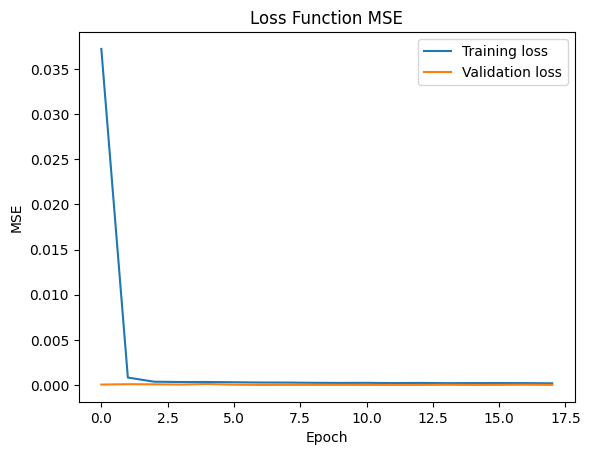

In [ ]:
import matplotlib.pyplot as plt

history = best_model.history
# grafik loss function MSE
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss Function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


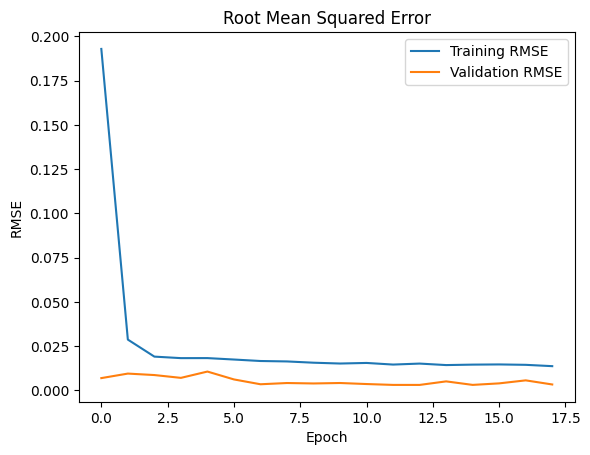

In [ ]:
# grafik RMSE
history = best_model.history

plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# history merupakan atribut dari grid_result hasil Grid Search CV
best_model = grid_result.best_estimator_.model

#Visualisasi hasil dari Prediksi

50/50 [==============================] - 0s 2ms/step


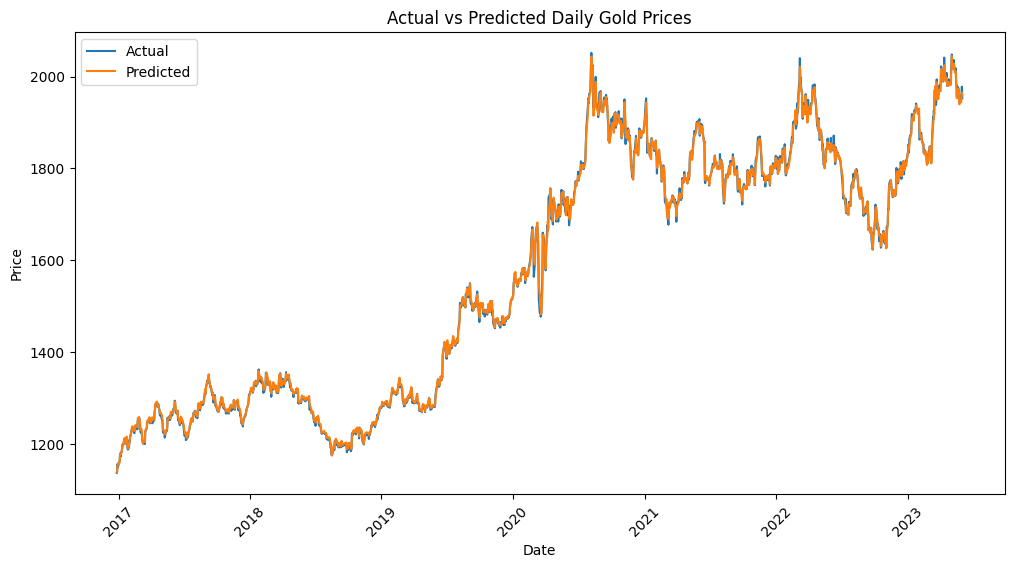

           Date  Actual    Predicted
3705 2016-12-27  1137.3  1139.371216
3706 2016-12-28  1139.4  1142.259644
3707 2016-12-29  1156.4  1152.944946
3708 2016-12-30  1150.0  1158.239868
3709 2017-01-03  1160.4  1157.885010
3710 2017-01-04  1163.8  1162.710327
3711 2017-01-05  1179.7  1179.011353
3712 2017-01-06  1171.9  1176.582642
3713 2017-01-09  1183.5  1180.859253
3714 2017-01-10  1184.2  1187.355225
3715 2017-01-11  1195.6  1191.304810
3716 2017-01-12  1198.9  1199.492188
3717 2017-01-13  1195.3  1195.973999
3718 2017-01-17  1212.0  1210.575928
3719 2017-01-18  1211.3  1212.962158
3720 2017-01-19  1200.9  1202.686768
3721 2017-01-20  1204.3  1208.006470
3722 2017-01-23  1215.0  1215.444702
3723 2017-01-24  1210.3  1216.332275
3724 2017-01-25  1197.3  1201.622314
3725 2017-01-26  1189.5  1195.873413
3726 2017-01-27  1188.1  1190.522705
3727 2017-01-30  1193.2  1194.996460
3728 2017-01-31  1208.6  1205.296021
3729 2017-02-01  1205.6  1209.059814
3730 2017-02-02  1216.7  1217.333252
3

In [ ]:
# Mengubah hasil prediksi menjadi skala semula
test_predictions_scaled = scaler.inverse_transform(best_model.predict(test_X_reshaped).reshape(-1, 1))
test_y_scaled = scaler.inverse_transform(test_y_scaled)

# Mengubah indeks dari test set menjadi tanggal
test_dates = test_data['date'].values

# Membuat plot hasil prediksi vs nilai sebenarnya pada data test
plt.figure(figsize=(12, 6))
plt.plot(test_dates, test_data['close'], label='Actual')
plt.plot(test_dates, test_predictions_scaled, label='Predicted')
plt.title('Actual vs Predicted Daily Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Membuat DataFrame untuk visualisasi tabel
visualization_data = pd.DataFrame({
    'Date': test_dates,
    'Actual': test_data['close'],
    'Predicted': test_predictions_scaled.flatten()
})

# Menampilkan beberapa baris pertama dari DataFrame visualization_data
print(visualization_data.head(30))


In [ ]:
import plotly.express as px

# Membuat DataFrame untuk hasil prediksi
predicted_train_data = pd.DataFrame({
    'Date': train_data['date'],
    'Actual': train_data['close'],
    'Predicted': scaler.inverse_transform(best_model.predict(train_X_reshaped).reshape(-1, 1)).flatten()
})

predicted_test_data = pd.DataFrame({
    'Date': test_data['date'],
    'Actual': test_data['close'],
    'Predicted': scaler.inverse_transform(best_model.predict(test_X_reshaped).reshape(-1, 1)).flatten()
})

# Visualisasi data training
fig_train = px.line(predicted_train_data, x='Date', y=['Actual', 'Predicted'], title='Actual vs Predicted Train Data')
fig_train.show()

# Visualisasi data testing
fig_test = px.line(predicted_test_data, x='Date', y=['Actual', 'Predicted'], title='Actual vs Predicted Test Data')
fig_test.show()


50/50 [==============================] - 0s 2ms/step


In [ ]:
# Save the best model to a file
best_model.save('coba_Grid_search_close_LSTM.h5')

# Load the saved model
loaded_model = k.models.load_model('coba_Grid_search_close_LSTM.h5')

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']